Load Dataset

In [31]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Visualizations

1)Univariate Analysis

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_ex_0=df.loc[df['Exited']==0]

In [7]:
df_ex_1=df.loc[df['Exited']==1]

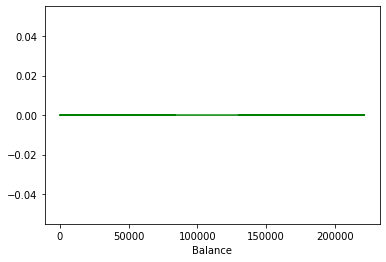

In [8]:
plt.plot(df_ex_0['Balance'],np.zeros_like(df_ex_0['Balance']),color='green')
plt.xlabel('Balance')
plt.show()

2)Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


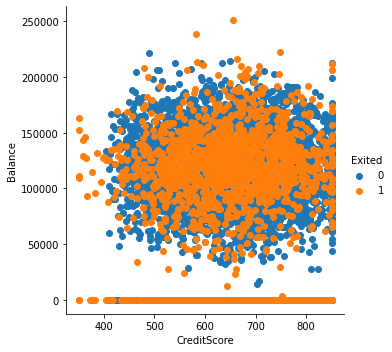

In [9]:
import seaborn as sns 
sns.FacetGrid(df,hue='Exited',size=5).map(plt.scatter,'CreditScore','Balance').add_legend()

3)Multivariate Analysis

In [12]:
sns.pairplot(df,hue='Exited',height=5)

Output hidden; open in https://colab.research.google.com to view.

Descriptive Statistics

In [13]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Handling Missing Values

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Find and Replace Outliers

In [15]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


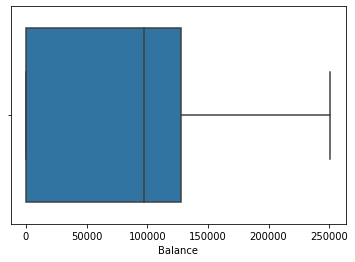

In [16]:
sns.boxplot(df['Balance'])

Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [18]:
le=LabelEncoder()

In [19]:
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
df['Surname']=le.fit_transform(df['Surname'])

In [20]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Dependent and Independent variables

In [21]:
x=df.iloc[:,0:13]

In [22]:
y=df['Exited']

Test and Training Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
sc_xtrain=sc.fit_transform(xtrain)

In [28]:
sc_xtest=sc.transform(xtest)

In [29]:
sc_xtrain

array([[ 0.21769112,  1.02728282, -0.54142705, ...,  0.63998842,
        -1.03223352, -1.58012433],
       [-0.75855874,  0.31643278,  1.57333206, ...,  0.63998842,
        -1.03223352, -1.29494016],
       [-0.16720654,  1.55633397,  1.0120802 , ...,  0.63998842,
        -1.03223352, -0.1037722 ],
       ...,
       [-1.27590547, -0.00205524, -0.13765725, ...,  0.63998842,
        -1.03223352, -0.14337009],
       [ 0.78137772,  0.34722286, -0.13765725, ...,  0.63998842,
        -1.03223352, -0.74440202],
       [-1.29492557, -0.03291471, -1.69471672, ...,  0.63998842,
        -1.03223352, -1.71465666]])

In [30]:
sc_xtest

array([[-1.41665421, -0.40450487, -0.31882083, ..., -1.56252827,
         0.96877303,  1.24099349],
       [ 1.49445857, -0.96272266, -0.43841247, ...,  0.63998842,
        -1.03223352,  1.17022775],
       [-0.94772228,  1.5265013 ,  1.26784054, ...,  0.63998842,
        -1.03223352,  1.70585853],
       ...,
       [ 0.86679527,  0.61160968,  1.23942272, ...,  0.63998842,
        -1.03223352, -1.20683567],
       [ 0.08351296, -1.54902479, -0.55800411, ..., -1.56252827,
         0.96877303,  1.71161804],
       [ 1.59785875,  1.1356656 , -1.26016096, ..., -1.56252827,
        -1.03223352, -0.80693265]])